In [3]:
import numpy as np
a = np.array([1,2,3])


In [17]:
a = np.array([1,1])
np.where(a>1)[0]

array([], dtype=int64)

In [18]:
len(np.where(a>1)[0])

0

In [11]:
b = np.diff(a)
b

array([ 53, -44,  -4])

In [13]:
np.where(b<1)[0][0]

1

In [20]:
P = [2,4,5]
_ = P.pop(0)
print(P)
P.insert(0,3)
print(P)

[4, 5]
[3, 4, 5]


In [27]:
ord('Z')

90

In [3]:
import monai
import numpy as np
import torch

In [15]:
def compute_hd95(preds, gt):
    # print(preds.shape)
    # print(gt.shape)
    cd = monai.metrics.compute_hausdorff_distance(preds, gt, include_background=True, percentile=95)
    return cd.mean().item()

In [17]:
a = torch.zeros(32,512,512)
b = torch.ones(32,512,512)
compute_hd95(a,b)

/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(
/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 1 is all 0, this may result in nan/inf distance.
  warnings.warn(
/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 2 is all 0, this may result in nan/inf distance.
  warnings.warn(
/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 3 is all 0, this may result in nan/inf distance.
  warnings.warn(
/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 4 is all 0, this may result in nan/inf distance.
  warnings.warn(
/home/ubuntu/anaconda3/envs/dassl/l

KeyboardInterrupt: 

In [18]:
a = torch.load('./experiments/exp1/tmp_preds.pt')
b = torch.load('./experiments/exp1/tmp_labels.pt')


In [19]:
a.any()

tensor(False, device='cuda:0')

In [16]:
compute_hd95(a,b)

/home/ubuntu/anaconda3/envs/dassl/lib/python3.8/site-packages/monai/metrics/utils.py:338: UserWarning: the prediction of class 0 is all 0, this may result in nan/inf distance.
  warnings.warn(


nan

In [ ]:
import torch

In [22]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import imageio
import torch

(375, 500, 3)
[  0  64 128 192 224]
[0 0 0]


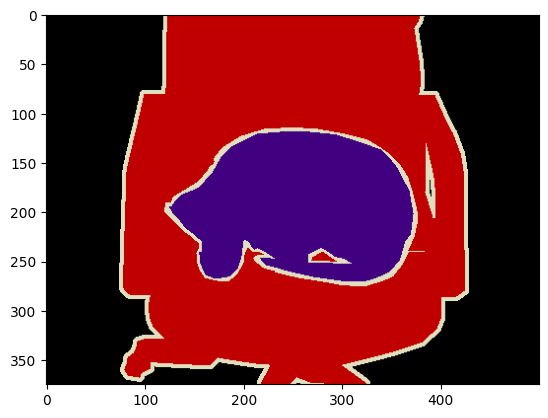

In [33]:
im_path = '/mnt/store/jparanj1/PASCAL_VOC/VOCtrainval_11-May-2012/VOCdevkit/VOC2012/SegmentationClass/2007_000063.png'
a = np.array(Image.open(im_path).convert('RGB'))
print(a.shape)
print(np.unique(a))
print(a[20,20])
plt.imshow(a)

In [31]:
a = torch.zeros((20,256,256))
a[4] += 1
torch.argmax(a,dim=0)[0][0]

tensor(4)

In [24]:
y_true = torch.ones((2,2,2))
y_true[0][0][1] = 0
y_true[1][0][0] = 0
y_true[1][0][1] = 0
y_true[0][1][0] = 0
y_true[0][1][1] = 0


y_pred = torch.ones((2,2,2))
y_pred[0][0,0] = 0.9
y_pred[0][0,1] = 0.5
y_pred[0][1,0] = 0.4
y_pred[0][1,1] = 0.1
y_pred[1] = 1 - y_pred[0]

y_true = y_true.unsqueeze(0)
y_pred = y_pred.unsqueeze(0)
print(y_true)
print(y_pred)

tensor([[[[1., 0.],
          [0., 0.]],

         [[0., 0.],
          [1., 1.]]]])
tensor([[[[0.9000, 0.5000],
          [0.4000, 0.1000]],

         [[0.1000, 0.5000],
          [0.6000, 0.9000]]]])


In [2]:
import torch
import numpy as np
def no_blank_miou(y_true, y_pred):
    print(y_true.shape, y_pred.shape)
    #y_true and y_pred are BXCXHXW
    collapsed_true = (1+torch.argmax(y_true, axis=1))*(torch.any(y_true, axis=1))
    print(collapsed_true.shape)
    print(collapsed_true)
    tmp = 0.5*torch.ones((y_pred.shape[0],1,y_pred.shape[2],y_pred.shape[3]))
    print("tmp :",tmp.shape, " pred shape: ", y_pred.shape)
    collapsed_pred = torch.argmax(torch.cat([tmp, y_pred],dim=1), dim=1)
    print(collapsed_pred.shape)
    print(collapsed_pred)

    intersection = torch.sum(((collapsed_pred == collapsed_true)&(collapsed_true>0)), axis=(-1,-2))
    print(intersection.shape)

    union = torch.sum((collapsed_pred>0),axis=(-1,-2)) + torch.sum((collapsed_true>0),axis=(-1,-2)) - intersection
    print(union.shape)
    return torch.mean(intersection/union)


In [3]:
a = torch.ones((1,1,2,2))
b = torch.ones((1,2,2,2))
c = torch.cat([a,b],axis=1)
print(c.shape)

torch.Size([1, 3, 2, 2])


In [5]:
import matplotlib.pyplot as plt

In [9]:
label_tmp = np.load('pascal_voc_experiments/exp5/tmp_labelsd.npy')
pred_tmp = np.load('pascal_voc_experiments/exp5/tmp_pred.npy')
print(label_tmp.shape)
print(pred_tmp.shape)

(1, 20, 256, 256)
(1, 20, 256, 256)


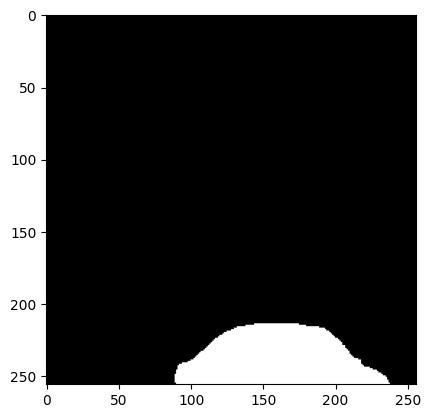

In [11]:
plt.imshow(label_tmp[0][6],cmap='gray')

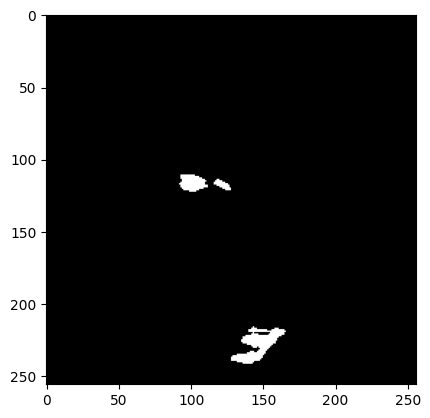

In [25]:
plt.imshow(pred_tmp[0][0], cmap='gray')

In [24]:
torch.argmax(torch.Tensor(pred_tmp), dim=-1).argmax(dim=-1)

tensor([[231,   0,   0,   0,   0, 232,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0]])

In [7]:
a=torch.Tensor(label_tmp)
b = (torch.Tensor(label_tmp)*torch.randn_like(torch.Tensor(label_tmp)))>0.5

In [8]:
b.max()

tensor(True)

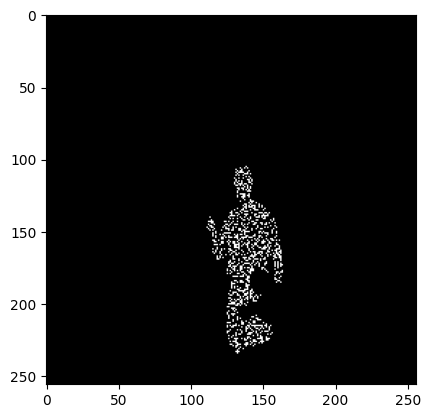

In [66]:
plt.imshow(a[0][14],cmap='gray')
plt.imshow(b[0][14],cmap='gray')

In [67]:
no_blank_miou(torch.Tensor(label_tmp), (torch.Tensor(label_tmp)*torch.randn_like(torch.Tensor(label_tmp)))>0.5)

torch.Size([1, 20, 256, 256]) torch.Size([1, 20, 256, 256])
torch.Size([1, 256, 256])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
tmp : torch.Size([1, 1, 256, 256])  pred shape:  torch.Size([1, 20, 256, 256])
torch.Size([1, 256, 256])
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])
torch.Size([1])
torch.Size([1])


tensor(0.3104)

In [38]:
from matplotlib import pyplot as plt
import cv2
from data_utils import get_data
import yaml
import numpy as np
import seaborn as sns

In [27]:
def make_hist1(nparray, density=True):
    plt.hist(nparray.ravel(), 256, [0,256], density = density)
    plt.show()

In [28]:
with open('data_configs/camvid.yml', 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
config['use_norm'] = False

In [48]:
def get_batch_imgs(config, center_num):
    data = get_data(config, center_num=center_num)
    imgs = []
    tr_data = data['train']
    for i in range(len(tr_data)):
        if i>200:
            break
        imgs.append(tr_data[i][0])
    imgs = np.stack(imgs)
    print(imgs.shape)
    return imgs

In [32]:
imgs1 = get_batch_imgs(config, 1)
imgs2 = get_batch_imgs(config, 2)
imgs3 = get_batch_imgs(config, 3)
imgs4 = get_batch_imgs(config, 4)

(24, 3, 256, 512)
(61, 3, 256, 512)
(181, 3, 256, 512)
(103, 3, 256, 512)


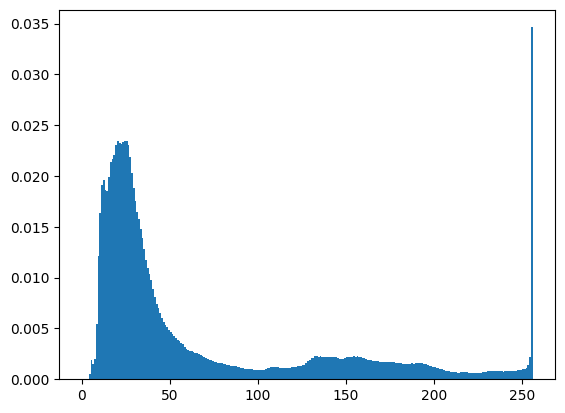

In [33]:
make_hist1(imgs1)

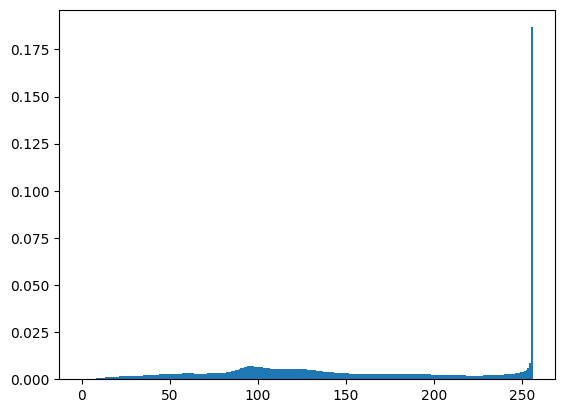

In [34]:
make_hist1(imgs2)

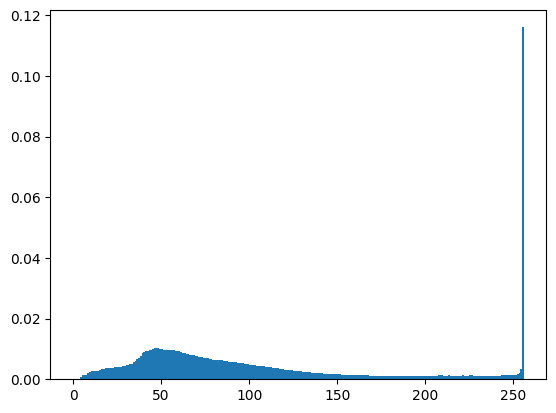

In [35]:
make_hist1(imgs3)

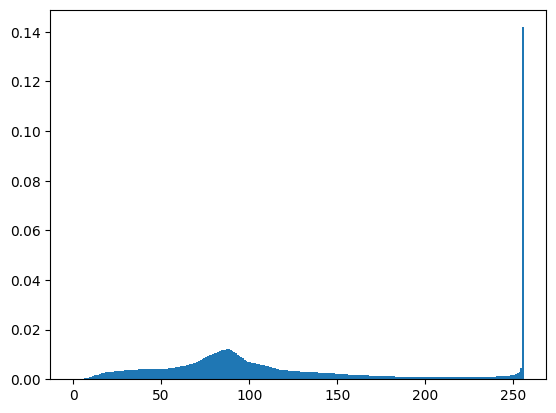

In [36]:
make_hist1(imgs4)

In [39]:
# Generate example datasets
data1 = np.random.normal(loc=0, scale=1, size=1000)
data2 = np.random.normal(loc=2, scale=1.5, size=800)
data3 = np.random.normal(loc=-1, scale=2, size=1200)

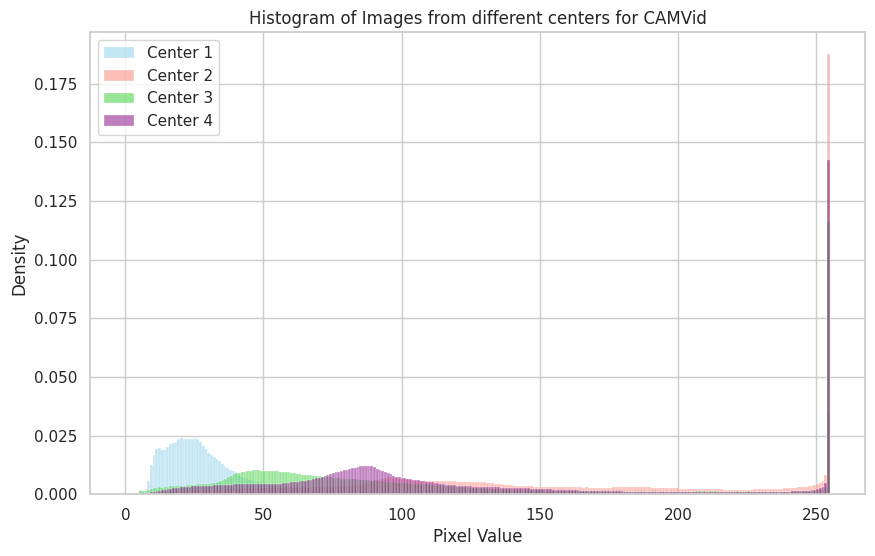

In [43]:
# Set style using seaborn
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for each dataset
sns.histplot(imgs1.ravel(), color='skyblue', alpha=0.5, label='Center 1', bins=256, stat='density')
sns.histplot(imgs2.ravel(), color='salmon', alpha=0.5, label='Center 2', bins=256, stat='density')
sns.histplot(imgs3.ravel(), color='limegreen', alpha=0.5, label='Center 3', bins=256, stat='density')
sns.histplot(imgs4.ravel(), color='purple', alpha=0.5, label='Center 4', bins=256, stat='density')

# Add labels and title
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.title('Histogram of Images from different centers for CAMVid')

# Add legend
plt.legend()

# Show plot
plt.show()

In [49]:
with open('data_configs/isic.yml', 'r') as f:
    skin_config = yaml.load(f, Loader=yaml.FullLoader)
skin_config['use_norm'] = False

In [50]:
skin_imgs1 = get_batch_imgs(skin_config, 1)
skin_imgs2 = get_batch_imgs(skin_config, 2)
skin_imgs3 = get_batch_imgs(skin_config, 3)

(201, 3, 256, 256)
(201, 3, 256, 256)
(201, 3, 256, 256)


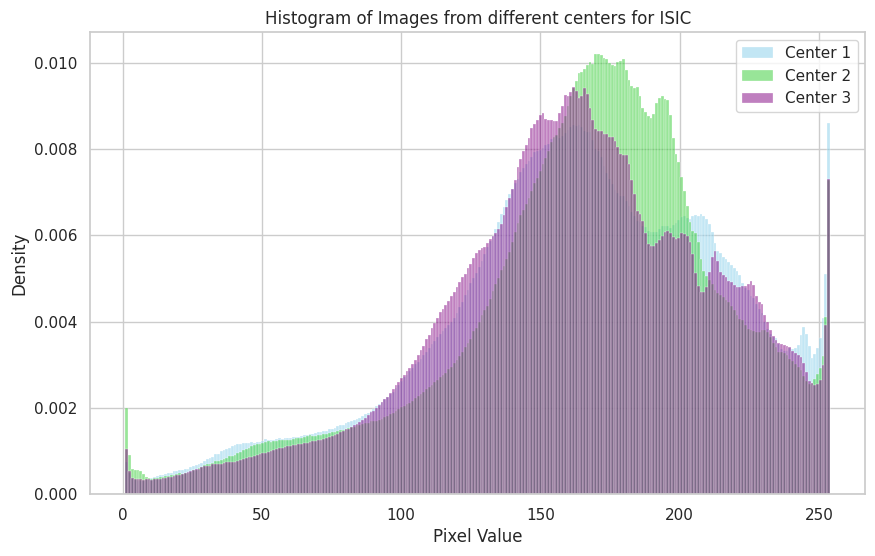

In [53]:
# Set style using seaborn
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for each dataset
sns.histplot(skin_imgs1.ravel(), color='skyblue', alpha=0.5, label='Center 1', bins=254, stat='density', binrange=[1,254])
sns.histplot(skin_imgs2.ravel(), color='limegreen', alpha=0.5, label='Center 2', bins=254, stat='density', binrange=[1,254])
sns.histplot(skin_imgs3.ravel(), color='purple', alpha=0.5, label='Center 3', bins=254, stat='density', binrange=[1,254])

# Add labels and title
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.title('Histogram of Images from different centers for ISIC')

# Add legend
plt.legend()

# Show plot
plt.show()

In [54]:
with open('data_configs/polypgen.yml', 'r') as f:
    polypgen_config = yaml.load(f, Loader=yaml.FullLoader)
polypgen_config['use_norm'] = False

In [55]:
polypgen_imgs1 = get_batch_imgs(polypgen_config, 1)
polypgen_imgs2 = get_batch_imgs(polypgen_config, 2)
polypgen_imgs3 = get_batch_imgs(polypgen_config, 3)
polypgen_imgs4 = get_batch_imgs(polypgen_config, 4)
polypgen_imgs5 = get_batch_imgs(polypgen_config, 5)
polypgen_imgs6 = get_batch_imgs(polypgen_config, 6)


(153, 3, 256, 256)
(180, 3, 256, 256)
(201, 3, 256, 256)
(136, 3, 256, 256)
(124, 3, 256, 256)
(52, 3, 256, 256)


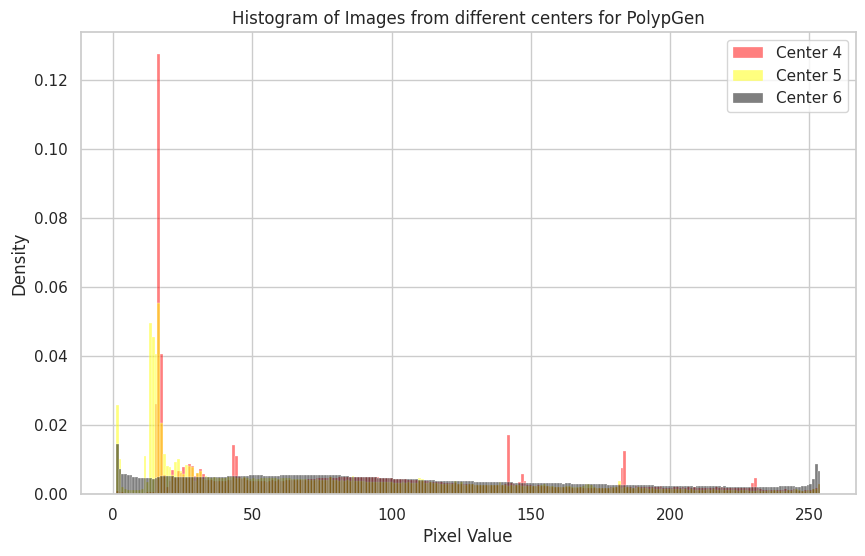

In [59]:
# Set style using seaborn
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot histograms for each dataset
# sns.histplot(polypgen_imgs1.ravel(), color='skyblue', alpha=0.5, label='Center 1', bins=254, stat='density', binrange=[1,254])
# sns.histplot(polypgen_imgs2.ravel(), color='limegreen', alpha=0.5, label='Center 2', bins=254, stat='density', binrange=[1,254])
# sns.histplot(polypgen_imgs3.ravel(), color='purple', alpha=0.5, label='Center 3', bins=254, stat='density', binrange=[1,254])
sns.histplot(polypgen_imgs4.ravel(), color='red', alpha=0.5, label='Center 4', bins=254, stat='density', binrange=[1,254])
sns.histplot(polypgen_imgs5.ravel(), color='yellow', alpha=0.5, label='Center 5', bins=254, stat='density', binrange=[1,254])
sns.histplot(polypgen_imgs6.ravel(), color='black', alpha=0.5, label='Center 6', bins=254, stat='density', binrange=[1,254])


# Add labels and title
plt.xlabel('Pixel Value')
plt.ylabel('Density')
plt.title('Histogram of Images from different centers for PolypGen')

# Add legend
plt.legend()

# Show plot
plt.show()